# Loading abalone data and importing all the required liberaries

In [1]:
import numpy as np 
import pandas as pd 
from sklearn import linear_model
from sklearn import model_selection
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
import seaborn as sns

In [21]:
abalone=pd.read_csv('abalone.csv')
abalone.head()

,Sex,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Viscera_Weight,Shell_Weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [24]:
#Assisgn the data to the DataFrame
df=pd.DataFrame(data=abalone)
df.head()

,Sex,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Viscera_Weight,Shell_Weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [25]:
#Sex is either Male ("M"), Female ("F") or Infant ("I"), this is not suitable for regression algorithms.
#So created a numeric feature: 1:Male, 2: Female, 3:Infant
sex_dictionary = {'M': 1, 'F' : 2,'I':3}
df['Sex'] = df['Sex'].apply(lambda x: sex_dictionary[x])

In [26]:
#Finding datatype of all the variables
df.dtypes

Sex                 int64
Length            float64
Diameter          float64
Height            float64
Whole_Weight      float64
Shucked_Weight    float64
Viscera_Weight    float64
Shell_Weight      float64
Rings               int64
dtype: object

In [29]:
#Finding the shape and description of dataframe
print(df.shape)
print(df.columns)
df.describe()

(4177, 9)
Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_Weight', 'Shucked_Weight',
       'Viscera_Weight', 'Shell_Weight', 'Rings'],
      dtype='object')


,Sex,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Viscera_Weight,Shell_Weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.955470,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.827815,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,1.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,1.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,2.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,3.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,3.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [30]:
#Checking the null values
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_Weight      0
Shucked_Weight    0
Viscera_Weight    0
Shell_Weight      0
Rings             0
dtype: int64

In [31]:
#Adding age column in the dataframe for classification. Age is classified based on the number of rings.
def label_race (row):
   if row['Rings']>=1 and row['Rings']<=8:
      return 1
   elif row['Rings'] >=9 and row['Rings']<=10:
      return 2
   elif row['Rings']>=11 and row['Rings']<=29:
      return 3
   return 0

In [33]:
df['Age'] = df.apply(lambda _: '', axis=1)
df['Age']=df.apply (lambda row: label_race (row),axis=1)
df

,Sex,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Viscera_Weight,Shell_Weight,Rings,Age
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,3
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,1
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,2
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,2
4,3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,1
5,3,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8,1
6,2,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,20,3
7,2,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.2600,16,3
8,1,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.1650,9,2
9,2,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.3200,19,3


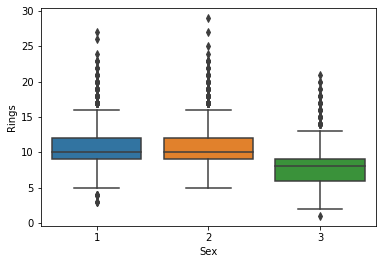

In [36]:
#Doing bivariate analysis
sns.boxplot(x="Sex", y="Rings", data=df)

In [37]:
#As per the above boxplot infants have lower number of rings as compared to male or female.

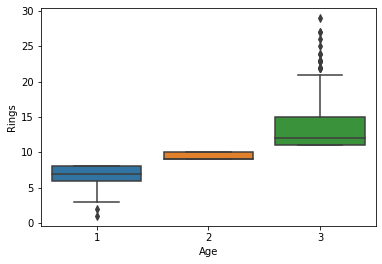

In [38]:
sns.boxplot(x="Age", y="Rings", data=df)

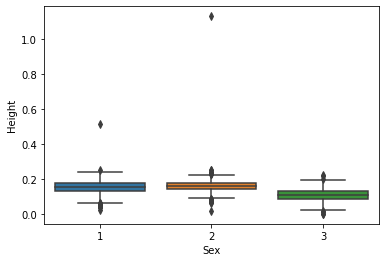

In [39]:
sns.boxplot(x="Sex", y="Height", data=df)

In [41]:
#Seperating x and y
y = df[['Age']]
y

,Age
0,3
1,1
2,2
3,2
4,1
5,1
6,3
7,3
8,2
9,3


In [42]:
x=df.drop(['Age','Rings'], axis=1)
x

,Sex,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Viscera_Weight,Shell_Weight
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
5,3,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200
6,2,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300
7,2,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.2600
8,1,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.1650
9,2,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.3200


In [44]:
#To check the best r state in Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

max_r_score=0
for r_state in range (40,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state, test_size=0.20)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print('r2_score corresponding to random state:',r_state, 'is:',r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print('max r2 score corresponding to', final_r_state, 'is', max_r_score)

r2_score corresponding to random state: 40 is: 0.44362924331848086
r2_score corresponding to random state: 41 is: 0.42653670589236137
r2_score corresponding to random state: 42 is: 0.4739225068192371
r2_score corresponding to random state: 43 is: 0.45658759434709684
r2_score corresponding to random state: 44 is: 0.4536961481323407
r2_score corresponding to random state: 45 is: 0.4482880728822036
r2_score corresponding to random state: 46 is: 0.47805666463494745
r2_score corresponding to random state: 47 is: 0.414878434218074
r2_score corresponding to random state: 48 is: 0.4717925835191451
r2_score corresponding to random state: 49 is: 0.4628316226604422
r2_score corresponding to random state: 50 is: 0.422552400862201
r2_score corresponding to random state: 51 is: 0.4552821784219213
r2_score corresponding to random state: 52 is: 0.46406737411943777
r2_score corresponding to random state: 53 is: 0.4709650126424467
r2_score corresponding to random state: 54 is: 0.46387136865546674
r2_sco

In [49]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [50]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

LR: 0.628857 (0.020153)


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

LDA: 0.647715 (0.016517)


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed 

KNN: 0.624359 (0.029678)
CART: 0.559711 (0.025581)


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

NB: 0.578565 (0.017653)


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

SVM: 0.607611 (0.026079)


In [51]:
model=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier()]
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False) is:
0.6160287081339713
[[222  43  11]
 [ 79  89 105]
 [ 42  41 204]]
              precision    recall  f1-score   support

           1       0.65      0.80      0.72       276
           2       0.51      0.33      0.40       273
           3       0.64      0.71      0.67       287

    accuracy                           0.62       836
   macro avg       0.60      0.61      0.60       836
weighted avg       0.60      0.62      0.60       836



Accuracy score of GaussianNB(priors=None, var_smoothing=1e-09) is:
0.5729665071770335
[[222  39  15]
 [ 66 100 107]
 [ 42  88 157]]

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



              precision    recall  f1-score   support

           1       0.67      0.80      0.73       276
           2       0.44      0.37      0.40       273
           3       0.56      0.55      0.55       287

    accuracy                           0.57       836
   macro avg       0.56      0.57      0.56       836
weighted avg       0.56      0.57      0.56       836





C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy score of SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False) is:
0.5992822966507177
[[210  54  12]
 [ 63 108 102]
 [ 28  76 183]]
              precision    recall  f1-score   support

           1       0.70      0.76      0.73       276
           2       0.45      0.40      0.42       273
           3       0.62      0.64      0.63       287

    accuracy                           0.60       836
   macro avg       0.59      0.60      0.59       836
weighted avg       0.59      0.60      0.59       836



Accuracy score of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_s